# Project 1: Classification For German Bank Credit Risk

### Part 3 - Data Modeling

#### Author: Amin
For this notebook, I will be training our models for the finalized dataset
<hr>

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

## 2. Getting our Data

In [2]:
df = pd.read_csv('finalized_data.csv')
df.head()

,age,job,duration,risk,credit,sex_male,housing_own,housing_rent,saving_accounts_moderate,saving_accounts_quite rich,saving_accounts_rich,checking_account_moderate,checking_account_rich,purpose_car,purpose_education,purpose_furniture/equipment,purpose_others,purpose_radio/TV
0,5,2,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1
1,1,2,5,1,2,0,1,0,0,0,0,1,0,0,0,0,0,1
2,3,1,2,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0
3,3,2,4,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0
4,4,2,3,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0


## 3. Modeling & Testing

### 3.1 Splitting out Data

In [3]:
X = df.drop('risk', axis = 1)
y = df['risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### 3.2 Logistic Regression

In [4]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [5]:
lr_train = lr.score(X_train, y_train)*100
lr_test = lr.score(X_test, y_test)*100

print("Train Score: " + str(lr_train))
print("Test Score: " + str(lr_test))

Train Score: 71.75
Test Score: 74.0


In [6]:
y_pred_lr = lr.predict(X_test)

print(accuracy_score(y_test,y_pred_lr))
print("\n")
print(confusion_matrix(y_test, y_pred_lr))

0.74


[[130  10]
 [ 42  18]]


In [7]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       140
           1       0.64      0.30      0.41        60

    accuracy                           0.74       200
   macro avg       0.70      0.61      0.62       200
weighted avg       0.72      0.74      0.71       200



### 3.3 SVM

In [8]:
svc = SVC(random_state=1)
svc.fit(X_train, y_train)

SVC(random_state=1)

In [9]:
svc_train = svc.score(X_train, y_train)*100
svc_test = svc.score(X_test, y_test)*100

print("Train Score: " + str(svc_train))
print("Test Score: " + str(svc_test))

Train Score: 72.0
Test Score: 71.0


In [10]:
y_pred_svc = svc.predict(X_test)

print(accuracy_score(y_test,y_pred_svc))
print("\n")
print(confusion_matrix(y_test, y_pred_svc))

0.71


[[134   6]
 [ 52   8]]


In [11]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.72      0.96      0.82       140
           1       0.57      0.13      0.22        60

    accuracy                           0.71       200
   macro avg       0.65      0.55      0.52       200
weighted avg       0.68      0.71      0.64       200



### 3.4 KNN

In [12]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
knn_train = knn.score(X_train, y_train)*100
knn_test = knn.score(X_test, y_test)*100

print("Train Score: " + str(knn_train))
print("Test Score: " + str(knn_test))

Train Score: 78.625
Test Score: 72.0


In [14]:
y_pred_knn = knn.predict(X_test)

print(accuracy_score(y_test,y_pred_knn))
print("\n")
print(confusion_matrix(y_test, y_pred_knn))

0.72


[[120  20]
 [ 36  24]]


In [15]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       140
           1       0.55      0.40      0.46        60

    accuracy                           0.72       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.70      0.72      0.71       200



### 3.5 Decision Tree

In [16]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [17]:
dt_train = dt.score(X_train, y_train)*100
dt_test = dt.score(X_test, y_test)*100

print("Train Score: " + str(dt_train))
print("Test Score: " + str(dt_test))

Train Score: 93.5
Test Score: 63.0


In [18]:
y_pred_dt = dt.predict(X_test)

print(accuracy_score(y_test,y_pred_dt))
print("\n")
print(confusion_matrix(y_test, y_pred_dt))

0.63


[[106  34]
 [ 40  20]]


In [19]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       140
           1       0.37      0.33      0.35        60

    accuracy                           0.63       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.62      0.63      0.62       200



### 3.6 Random Forest

In [20]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [21]:
rf_train = rf.score(X_train, y_train)*100
rf_test = rf.score(X_test, y_test)*100

print("Train Score: " + str(rf_train))
print("Test Score: " + str(rf_test))

Train Score: 93.5
Test Score: 65.5


In [22]:
y_pred_rf = rf.predict(X_test)

print(accuracy_score(y_test,y_pred_rf))
print("\n")
print(confusion_matrix(y_test, y_pred_rf))

0.655


[[113  27]
 [ 42  18]]


In [23]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       140
           1       0.40      0.30      0.34        60

    accuracy                           0.66       200
   macro avg       0.56      0.55      0.55       200
weighted avg       0.63      0.66      0.64       200



### 3.7 XGBoost

In [24]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
xgb_train = xgb.score(X_train, y_train)*100
xgb_test = xgb.score(X_test, y_test)*100

print("Train Score: " + str(xgb_train))
print("Test Score: " + str(xgb_test))

Train Score: 90.75
Test Score: 67.0


In [26]:
y_pred_xgb = xgb.predict(X_test)

print(accuracy_score(y_test,y_pred_xgb))
print("\n")
print(confusion_matrix(y_test, y_pred_xgb))

0.67


[[111  29]
 [ 37  23]]


In [27]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       140
           1       0.44      0.38      0.41        60

    accuracy                           0.67       200
   macro avg       0.60      0.59      0.59       200
weighted avg       0.66      0.67      0.66       200



## 4. Results of Initial Model

In [28]:
model_data = pd.DataFrame({'Model':['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'], 
                          'Train_score':[lr_train, svc_train, knn_train, dt_train, rf_train, xgb_train], 
                          'Test_score':[lr_test, svc_test, knn_test, dt_test, rf_test, xgb_test]})
model_data

,Model,Train_score,Test_score
0,Logistic Regression,71.750,74.0
1,SVC,72.000,71.0
2,KNN,78.625,72.0
3,Decision Tree,93.500,63.0
4,Random Forest,93.500,65.5
5,XGBoost,90.750,67.0


### Observations: 

1) <strong>Logistic Regression</strong> performed the best out of all our models having a score of 74.0  

2) <strong>Decision Tree</strong>, <strong>Random Forest</strong> & <strong>XGBoost</strong> were very overfitted.  

## 5. Hyperparameter Tuning  

### 5.1 Logistic Regression

In [29]:
%%time
lr_grid = {"C":[1, 10, 100, 1000], "penalty":["l1", "l2"]}

gs_lr = GridSearchCV(lr, lr_grid, cv = 10, verbose = 1, n_jobs = -1)
gs_lr.fit(X_train, y_train)

print(gs_lr.best_score_)
print(gs_lr.cv_results_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
0.70125
{'mean_fit_time': array([0.00069878, 0.02380664, 0.00059967, 0.01980331, 0.00059884,
       0.01810632, 0.0005996 , 0.01867189]), 'std_fit_time': array([0.00045747, 0.00524454, 0.00048963, 0.00481123, 0.00048895,
       0.00266991, 0.00048957, 0.00276532]), 'mean_score_time': array([0.        , 0.00170157, 0.        , 0.001898  , 0.        ,
       0.00170009, 0.        , 0.00165062]), 'std_score_time': array([0.        , 0.00045982, 0.        , 0.00053836, 0.        ,
       0.00039886, 0.        , 0.00063312]), 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params'

In [30]:
lr_optimal = gs_lr.best_params_
lr_optimal

{'C': 1, 'penalty': 'l2'}

In [31]:
# Score of our model
lr_train = gs_lr.score(X_train, y_train)*100
lr_test = gs_lr.score(X_test, y_test)*100

print("Train Score: " + str(lr_train))
print("Test Score: " + str(lr_test))

# Accuracy, recall & f1-scores
y_pred_lr = gs_lr.predict(X_test)
lr_accuracy = accuracy_score(y_test,y_pred_lr)
lr_recall = recall_score(y_test,y_pred_lr)
lr_f1 = f1_score(y_test,y_pred_lr)

print("Accuracy Score: " + str(lr_accuracy))
print("Recall Score: " + str(lr_recall))
print("f1 Score: " + str(lr_f1))

Train Score: 71.75
Test Score: 74.0
Accuracy Score: 0.74
Recall Score: 0.3
f1 Score: 0.4090909090909091


              precision    recall  f1-score   support

           0       0.76      0.93      0.83       140
           1       0.64      0.30      0.41        60

    accuracy                           0.74       200
   macro avg       0.70      0.61      0.62       200
weighted avg       0.72      0.74      0.71       200



Text(33.0, 0.5, 'Actual')

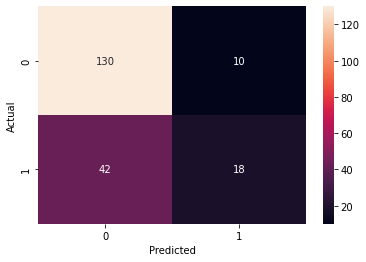

In [32]:
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

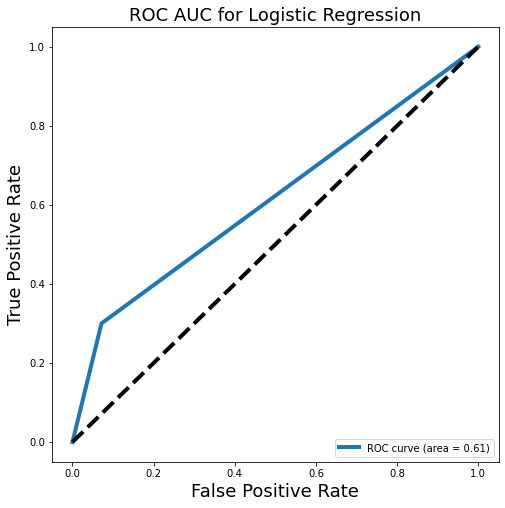

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
lr_roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % lr_roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC AUC for Logistic Regression', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 5.2 SVM

In [34]:
%%time

svc_grid = {'C':[0.1, 1, 10, 100],'gamma':[1, 0.1, 0.01, 0.001], 'kernel':['linear','rbf']}

gs_svc = GridSearchCV(svc, svc_grid, cv=10, verbose=1, n_jobs=-1)
gs_svc.fit(X_train, y_train)

print(gs_svc.best_score_)
print(gs_svc.cv_results_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
0.7100000000000001
{'mean_fit_time': array([0.01938481, 0.03358049, 0.01758938, 0.02848353, 0.01609061,
       0.02638471, 0.01539106, 0.02408607, 0.0217871 , 0.04307539,
       0.0203881 , 0.02958615, 0.01954556, 0.03171158, 0.0230149 ,
       0.02517037, 0.04148188, 0.03767514, 0.04108341, 0.0437947 ,
       0.04309542, 0.03238165, 0.0447746 , 0.03667836, 0.24034052,
       0.04397547, 0.23627744, 0.09186618, 0.23433986, 0.04335225,
       0.22323461, 0.0422735 ]), 'std_fit_time': array([0.00445197, 0.00119973, 0.00397759, 0.00135922, 0.00175695,
       0.00135558, 0.00066318, 0.00207001, 0.00455382, 0.00459003,
       0.0016237 , 0.00135434, 0.00313935, 0.00327006, 0.0024476 ,
       0.00158914, 0.00347946, 0.00170353, 0.00327485, 0.00678002,
       0.00374228, 0.00249665, 0.006286  , 0.00602971, 0.02478916,
       0.00579217, 0.02745362, 0.01028711, 0.02409156, 0.00308843,
       0.03078622, 0.00560382]), 'mean_score_ti

In [35]:
svc_optimal = gs_svc.best_params_
svc_optimal

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [36]:
# Score of our model
svc_train = gs_svc.score(X_train, y_train)*100
svc_test = gs_svc.score(X_test, y_test)*100

print("Train Score: " + str(svc_train))
print("Test Score: " + str(svc_test))

# Accuracy, recall & f1-scores
y_pred_svc = gs_svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,y_pred_svc)
svc_recall = recall_score(y_test,y_pred_svc)
svc_f1 = f1_score(y_test,y_pred_svc)

print("Accuracy Score: " + str(svc_accuracy))
print("Recall Score: " + str(svc_recall))
print("f1 Score: " + str(svc_f1))

Train Score: 72.75
Test Score: 70.5
Accuracy Score: 0.705
Recall Score: 0.15
f1 Score: 0.23376623376623373


              precision    recall  f1-score   support

           0       0.72      0.94      0.82       140
           1       0.53      0.15      0.23        60

    accuracy                           0.70       200
   macro avg       0.63      0.55      0.53       200
weighted avg       0.66      0.70      0.64       200



Text(33.0, 0.5, 'Actual')

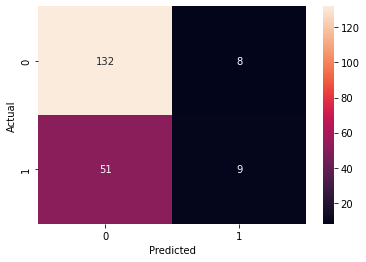

In [37]:
print(classification_report(y_test, y_pred_svc))

cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

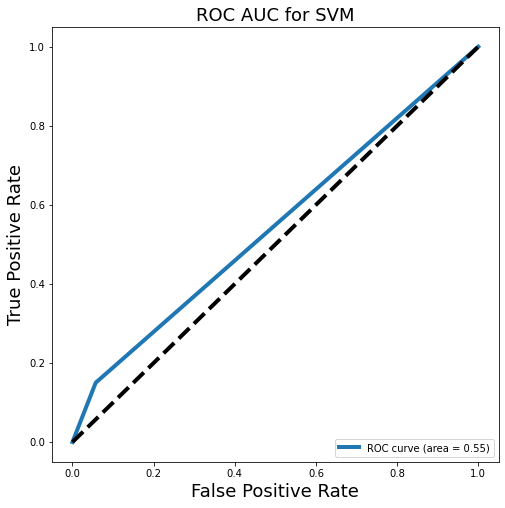

In [38]:
fpr, tpr, _ = roc_curve(y_test, y_pred_svc)
svc_roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % svc_roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC AUC for SVM', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 5.3 KNN

In [39]:
%%time

knn_grid = {'n_neighbors':np.arange(1, 21)}

gs_knn = GridSearchCV(knn, knn_grid, cv=10, verbose=1, n_jobs=-1)
gs_knn.fit(X_train, y_train)

print(gs_knn.best_score_)
print(gs_knn.cv_results_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
0.7150000000000001
{'mean_fit_time': array([0.00259917, 0.00199845, 0.00209863, 0.00199881, 0.00319872,
       0.00199904, 0.00180008, 0.00199785, 0.00199881, 0.00200043,
       0.00179951, 0.00219975, 0.00179908, 0.00209939, 0.00199883,
       0.0021986 , 0.00199909, 0.00189984, 0.00199904, 0.00229807]), 'std_fit_time': array([7.99590784e-04, 4.47342696e-04, 5.38350007e-04, 4.47021932e-04,
       2.35654927e-03, 1.23977661e-06, 4.00266913e-04, 4.47030388e-04,
       6.31769451e-04, 4.46062661e-04, 4.00096213e-04, 1.07677357e-03,
       4.00294378e-04, 5.38651190e-04, 6.32221538e-04, 5.99893355e-04,
       4.46595418e-04, 2.99892102e-04, 1.09458271e-03, 8.99198949e-04]), 'mean_score_time': array([0.00529649, 0.00569651, 0.00569646, 0.00919459, 0.0053962 ,
       0.00559645, 0.00589552, 0.00579641, 0.00599644, 0.00479553,
       0.00489674, 0.00499613, 0.00509684, 0.00519621, 0.00549672,
       0.00519707, 0.00509691, 0.0047

In [40]:
knn_optimal = gs_knn.best_params_
knn_optimal

{'n_neighbors': 16}

In [41]:
# Score of our model
knn_train = gs_knn.score(X_train, y_train)*100
knn_test = gs_knn.score(X_test, y_test)*100

print("Train Score: " + str(knn_train))
print("Test Score: " + str(knn_test))

# Accuracy, recall & f1-scores
y_pred_knn = gs_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test,y_pred_knn)
knn_recall = recall_score(y_test,y_pred_knn)
knn_f1 = f1_score(y_test,y_pred_knn)

print("Accuracy Score: " + str(knn_accuracy))
print("Recall Score: " + str(knn_recall))
print("f1 Score: " + str(knn_f1))

Train Score: 73.25
Test Score: 73.0
Accuracy Score: 0.73
Recall Score: 0.18333333333333332
f1 Score: 0.2894736842105263


              precision    recall  f1-score   support

           0       0.73      0.96      0.83       140
           1       0.69      0.18      0.29        60

    accuracy                           0.73       200
   macro avg       0.71      0.57      0.56       200
weighted avg       0.72      0.73      0.67       200



Text(33.0, 0.5, 'Actual')

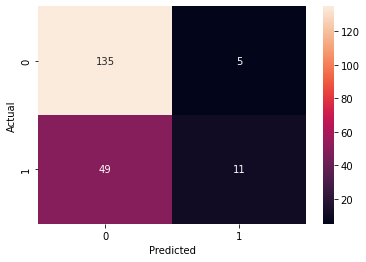

In [42]:
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

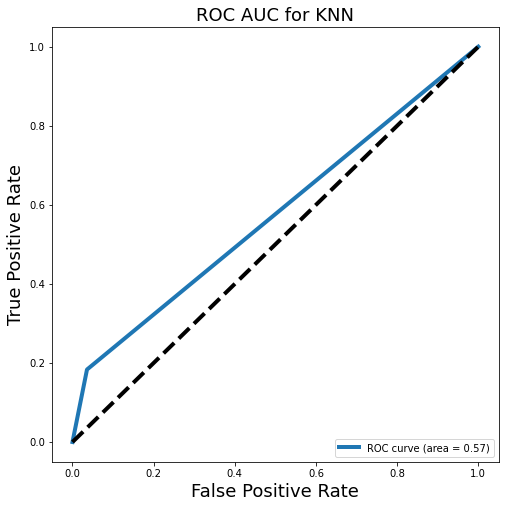

In [43]:
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
knn_roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % knn_roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC AUC for KNN', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 5.4 Decision Tree

In [44]:
%%time

dt_grid = {'criterion':['gini','entropy'], 
           'max_depth': np.arange(1, 21),
          'min_samples_split':np.arange(1, 21)}

gs_dt = GridSearchCV(dt, dt_grid, cv=10, verbose=1, n_jobs=-1)
gs_dt.fit(X_train, y_train)

print(gs_dt.best_score_)
print(gs_dt.cv_results_)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits
0.7162499999999999
{'mean_fit_time': array([0.00269887, 0.00259852, 0.00259829, 0.00269854, 0.00239861,
       0.00209894, 0.00209866, 0.00419731, 0.0021986 , 0.00319843,
       0.00219877, 0.00219865, 0.00239875, 0.00249875, 0.00259826,
       0.00219879, 0.00279849, 0.00429759, 0.00249872, 0.00259881,
       0.00199897, 0.00219884, 0.00249867, 0.00219867, 0.0024987 ,
       0.00219901, 0.0020988 , 0.00249867, 0.00259855, 0.00259845,
       0.00259843, 0.00249848, 0.0023988 , 0.0021987 , 0.00229874,
       0.00269849, 0.00259867, 0.00289814, 0.00209882, 0.00219867,
       0.00229886, 0.00239856, 0.00289819, 0.0027983 , 0.00209889,
       0.00239863, 0.00229852, 0.00239849, 0.00219884, 0.00219882,
       0.00229871, 0.00259852, 0.00229869, 0.0021986 , 0.00239866,
       0.00279858, 0.00239847, 0.00239885, 0.00239851, 0.00209913,
       0.00189891, 0.00219886, 0.00259867, 0.00220108, 0.0025985 ,
       0.00229897, 0.002898

In [45]:
dt_optimal = gs_dt.best_params_
dt_optimal

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 6}

In [46]:
# Score of our model
dt_train = gs_dt.score(X_train, y_train)*100
dt_test = gs_dt.score(X_test, y_test)*100

print("Train Score: " + str(dt_train))
print("Test Score: " + str(dt_test))

# Accuracy, recall & f1-scores
y_pred_dt = gs_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test,y_pred_dt)
dt_recall = recall_score(y_test,y_pred_dt)
dt_f1 = f1_score(y_test,y_pred_dt)

print("Accuracy Score: " + str(dt_accuracy))
print("Recall Score: " + str(dt_recall))
print("f1 Score: " + str(dt_f1))

Train Score: 76.5
Test Score: 72.0
Accuracy Score: 0.72
Recall Score: 0.23333333333333334
f1 Score: 0.33333333333333337


              precision    recall  f1-score   support

           0       0.74      0.93      0.82       140
           1       0.58      0.23      0.33        60

    accuracy                           0.72       200
   macro avg       0.66      0.58      0.58       200
weighted avg       0.69      0.72      0.68       200



Text(33.0, 0.5, 'Actual')

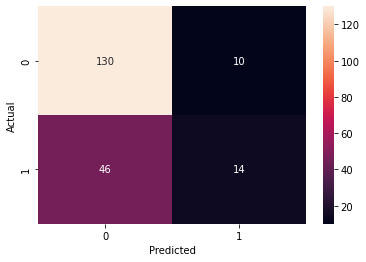

In [47]:
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

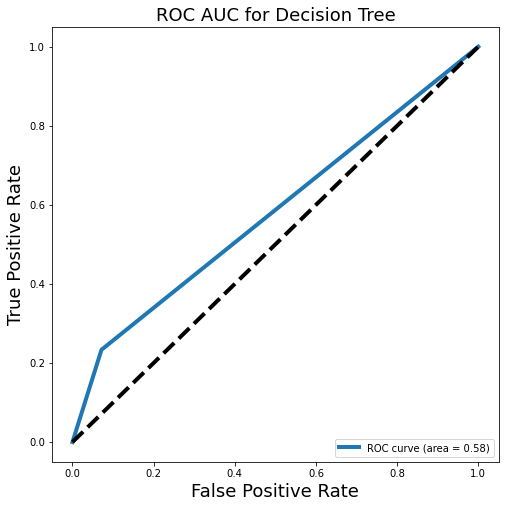

In [48]:
fpr, tpr, _ = roc_curve(y_test, y_pred_dt)
dt_roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % dt_roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC AUC for Decision Tree', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 5.5 Random Forest

In [49]:
%%time

tree_para = {
    'n_estimators': [100, 200, 300, 400],        
    'criterion':['gini','entropy'], 
    'max_depth':np.arange(1, 21), 
    'min_samples_split': np.arange(1, 21)}

gs_rf = GridSearchCV(rf, tree_para, cv = 10, verbose = 1, n_jobs = -1)  
gs_rf.fit(X_train, y_train)

print(gs_rf.best_score_)
print(gs_rf.cv_results_)

Fitting 10 folds for each of 3200 candidates, totalling 32000 fits
0.7275
{'mean_fit_time': array([0.03547873, 0.07315812, 0.10404046, ..., 0.3291713 , 0.44847503,
       0.5543767 ]), 'std_fit_time': array([0.00196085, 0.00772641, 0.0071715 , ..., 0.02289907, 0.03285649,
       0.00945656]), 'mean_score_time': array([0.        , 0.        , 0.        , ..., 0.02233438, 0.03124683,
       0.04323239]), 'std_score_time': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.14957064e-02, 2.06214843e-06, 8.42345891e-03]), 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                   'entropy'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[1, 1, 1, ..., 20, 20, 20],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_split': masked_array(

In [50]:
rf_optimal = gs_rf.best_params_
rf_optimal

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_split': 2,
 'n_estimators': 400}

In [51]:
# Score of our model
rf_train = gs_rf.score(X_train, y_train)*100
rf_test = gs_rf.score(X_test, y_test)*100

print("Train Score: " + str(rf_train))
print("Test Score: " + str(rf_test))

# Accuracy, recall & f1-scores
y_pred_rf = gs_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
rf_recall = recall_score(y_test,y_pred_rf)
rf_f1 = f1_score(y_test,y_pred_rf)

print("Accuracy Score: " + str(rf_accuracy))
print("Recall Score: " + str(rf_recall))
print("f1 Score: " + str(rf_f1))

Train Score: 90.0
Test Score: 69.0
Accuracy Score: 0.69
Recall Score: 0.3
f1 Score: 0.3673469387755102


              precision    recall  f1-score   support

           0       0.74      0.86      0.79       140
           1       0.47      0.30      0.37        60

    accuracy                           0.69       200
   macro avg       0.61      0.58      0.58       200
weighted avg       0.66      0.69      0.67       200



Text(33.0, 0.5, 'Actual')

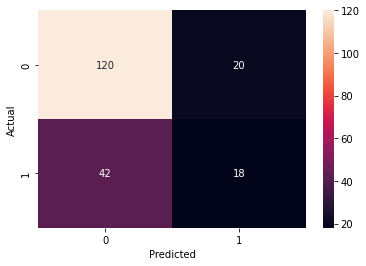

In [52]:
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

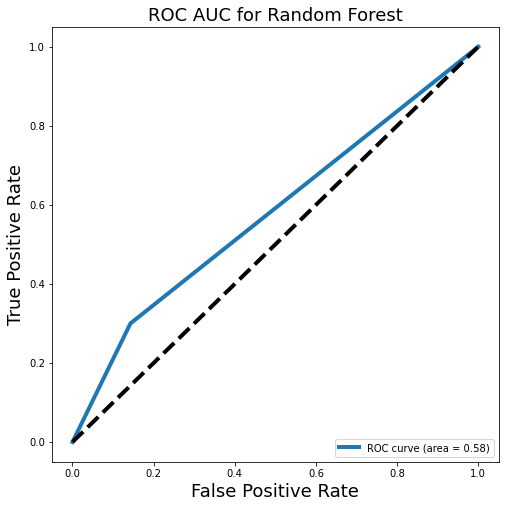

In [53]:
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
rf_roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % rf_roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC AUC for Random Forest', fontsize=18)
plt.legend(loc="lower right")
plt.show()

### 5.6 XGBoost

In [54]:
%%time
xgb_grid = {'max_depth':[3, 6, 9, 12],'min_child_weight':[1, 2, 3], 
            'gamma':[0, 0.1, 0.2], 'subsample':[0.5, 1],
           'colsample_bytree':[0.5, 1]}

gs_xgb = GridSearchCV(xgb, xgb_grid, cv = 10, verbose = 1, n_jobs = -1)
gs_xgb.fit(X_train, y_train)

print(gs_xgb.best_score_)
print(gs_xgb.cv_results_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
0.71
{'mean_fit_time': array([0.0671829 , 0.04374661, 0.05155885, 0.04530933, 0.052247  ,
       0.0392889 , 0.07030745, 0.06562021, 0.0734323 , 0.06405802,
       0.07343256, 0.0640578 , 0.08873146, 0.08730276, 0.07811925,
       0.08436902, 0.07030764, 0.08280678, 0.09132457, 0.1047565 ,
       0.08035111, 0.09061832, 0.07343159, 0.08600309, 0.05163028,
       0.04530933, 0.04999635, 0.04530952, 0.05155897, 0.03905954,
       0.07499437, 0.06562014, 0.07187006, 0.06405797, 0.06874487,
       0.06249568, 0.08749356, 0.09061892, 0.07968183, 0.08905575,
       0.0781194 , 0.08436899, 0.09218059, 0.11717935, 0.08436863,
       0.10142493, 0.07799728, 0.08905618, 0.05937116, 0.0531214 ,
       0.06093316, 0.05624616, 0.0531214 , 0.04843404, 0.08280697,
       0.06874514, 0.082126  , 0.08422918, 0.07792532, 0.06562037,
       0.09061868, 0.09686792, 0.0859313 , 0.08749404, 0.07968218,
       0.09218104, 0.09530554, 0.09530566

In [55]:
xgb_optimal = gs_xgb.best_params_
xgb_optimal

{'colsample_bytree': 1,
 'gamma': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'subsample': 1}

In [56]:
# Score of our model
xgb_train = gs_xgb.score(X_train, y_train)*100
xgb_test = gs_xgb.score(X_test, y_test)*100

print("Train Score: " + str(xgb_train))
print("Test Score: " + str(xgb_test))

# Accuracy, recall & f1-scores
y_pred_xgb = gs_xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test,y_pred_xgb)
xgb_recall = recall_score(y_test,y_pred_xgb)
xgb_f1 = f1_score(y_test,y_pred_xgb)

print("Accuracy Score: " + str(xgb_accuracy))
print("Recall Score: " + str(xgb_recall))
print("f1 Score: " + str(xgb_f1))

Train Score: 76.625
Test Score: 71.5
Accuracy Score: 0.715
Recall Score: 0.36666666666666664
f1 Score: 0.4356435643564356


              precision    recall  f1-score   support

           0       0.76      0.86      0.81       140
           1       0.54      0.37      0.44        60

    accuracy                           0.71       200
   macro avg       0.65      0.62      0.62       200
weighted avg       0.69      0.71      0.70       200



Text(33.0, 0.5, 'Actual')

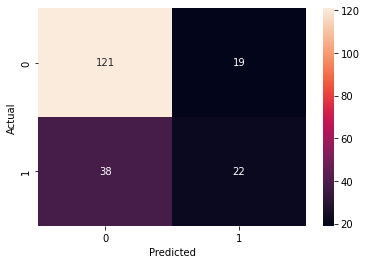

In [57]:
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

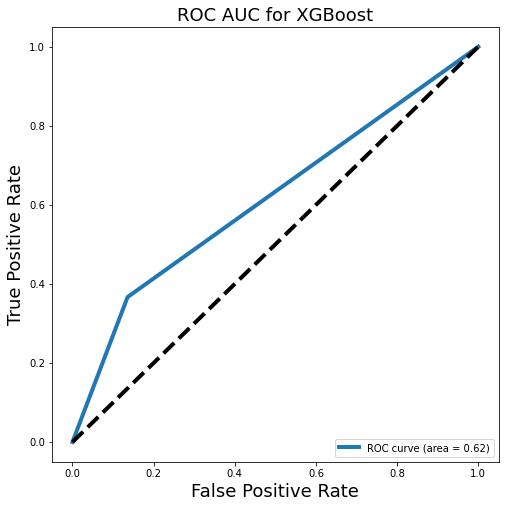

In [58]:
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
xgb_roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % xgb_roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC AUC for XGBoost', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## 6. Results of our Tuned Model

In [59]:
tuned_model_data = pd.DataFrame({'Model':['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost'], 
                          'Tuned Train Score':[lr_train, svc_train, knn_train, dt_train, rf_train, xgb_train], 
                          'Tuned Test Score':[lr_test, svc_test, knn_test, dt_test, rf_test, xgb_test], 
                                'Recall':[lr_recall, svc_recall, knn_recall, dt_recall, rf_recall, xgb_recall],
                                'f1-score':[lr_f1, svc_f1, knn_f1, dt_f1, rf_f1, xgb_f1], 
                                'ROC AUC':[lr_roc_auc, svc_roc_auc, knn_roc_auc, dt_roc_auc, rf_roc_auc, xgb_roc_auc]})
tuned_model_data

,Model,Tuned Train Score,Tuned Test Score,Recall,f1-score,ROC AUC
0,Logistic Regression,71.750,74.0,0.300000,0.409091,0.614286
1,SVC,72.750,70.5,0.150000,0.233766,0.546429
2,KNN,73.250,73.0,0.183333,0.289474,0.573810
3,Decision Tree,76.500,72.0,0.233333,0.333333,0.580952
4,Random Forest,90.000,69.0,0.300000,0.367347,0.578571
5,XGBoost,76.625,71.5,0.366667,0.435644,0.615476


### 6.1 Comparing the results for Initial and Tuned Models

In [60]:
final_score = model_data.merge(tuned_model_data, on = 'Model')
final_score

,Model,Train_score,Test_score,Tuned Train Score,Tuned Test Score,Recall,f1-score,ROC AUC
0,Logistic Regression,71.750,74.0,71.750,74.0,0.300000,0.409091,0.614286
1,SVC,72.000,71.0,72.750,70.5,0.150000,0.233766,0.546429
2,KNN,78.625,72.0,73.250,73.0,0.183333,0.289474,0.573810
3,Decision Tree,93.500,63.0,76.500,72.0,0.233333,0.333333,0.580952
4,Random Forest,93.500,65.5,90.000,69.0,0.300000,0.367347,0.578571
5,XGBoost,90.750,67.0,76.625,71.5,0.366667,0.435644,0.615476


In [61]:
tuned_model_data.nlargest(3, ['Recall', 'Tuned Test Score', 'f1-score'])

,Model,Tuned Train Score,Tuned Test Score,Recall,f1-score,ROC AUC
5,XGBoost,76.625,71.5,0.366667,0.435644,0.615476
0,Logistic Regression,71.750,74.0,0.300000,0.409091,0.614286
4,Random Forest,90.000,69.0,0.300000,0.367347,0.578571


## 7. Conclusion

### 7.1 Objectives:  

1) Determine the client profile of those with good and bad risk.  

- <strong>Age</strong>: Across all other variables, those that are older generally tend to be a good risk as opposed to younger individuals.  


- <strong>Credit amount</strong>: Generally tends to be lower for good risk when compared with other variables. 


- <strong>Duration</strong>: Also generally tends to be lower for good risk when compared with other variables. Good risks are mostly when durations are below 20 months, while those above are mostly bad risk.  


- <strong>Gender</strong>: Males tend to be better risk as compared to females.  


- <strong>Job Type</strong>: Unskilled & non-resident, unskilled & resident, and skilled individuals tend to be better risk as compared to highly skilled ones.  


- <strong>Housing Type</strong>: Individuals who owns their housing tends to be better risk than those whose housing is either free or rent.  


- <strong>Checking Account</strong>: Those who are classified as little & rich checking account had better risk as compared to those with moderate.  


- <strong>Saving Account</strong>: Those who are classified as little, quite rich & rich saving account had better risk as compared to those with moderate.  


- <strong>Purpose</strong>: Those for the purpose of cars, furniture/equipment & radio are better risk than those of business, domestic appliances, repairs, education & vacation/others.  


2) Create a model that would be able to predict whether a client is a good or bad risk.  
- <strong>XGBoost</strong> is the best model out of all for the prediction of cardiovascular disease.  

    - **Recall** is our more important metric since we wanted to focus more on being able to detect bad risks. XGBoost had the best at 0.37  
    - Has an **accuracy** of 0.72  
    - Has a **precision** of 0.54  
    - Has a **f1-score** of 0.44  
    - Has an **ROC AUC** of 0.62  


### 7.2 Next Steps: 

1) Further tuning of our hyperparameters needed.  
    - Results gotten is far from good.  

2) Apply SMOTE technique to our dataset.  
    - Our data is imbalanced with 70% being good risk, while the remainder were bad risk.  